In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

# preprocess is a personal .py file
from preprocess import countplot_percentages, balance_classes

In [2]:
def return_feature_importances(model):

    """
    Pass in the model
    """
    importances = model.feature_importances_
    features = pd.DataFrame({'Features':X.columns, 'Importances': importances})
    features = features.sort_values('Importances', ascending = False)
    
    plt.figure(figsize = (16,8))
    sns.barplot(x= 'Features', y ='Importances', data = features)
    plt.xticks(rotation = 90)
    
    return features


In [86]:
path = 'C:\\Users\\Ufuk Altan\\Desktop\\School\\Semester1\\MarketingAnalysis\\data\\'
df = pd.read_csv(path + 'Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.iloc[:, 3:14].head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:>

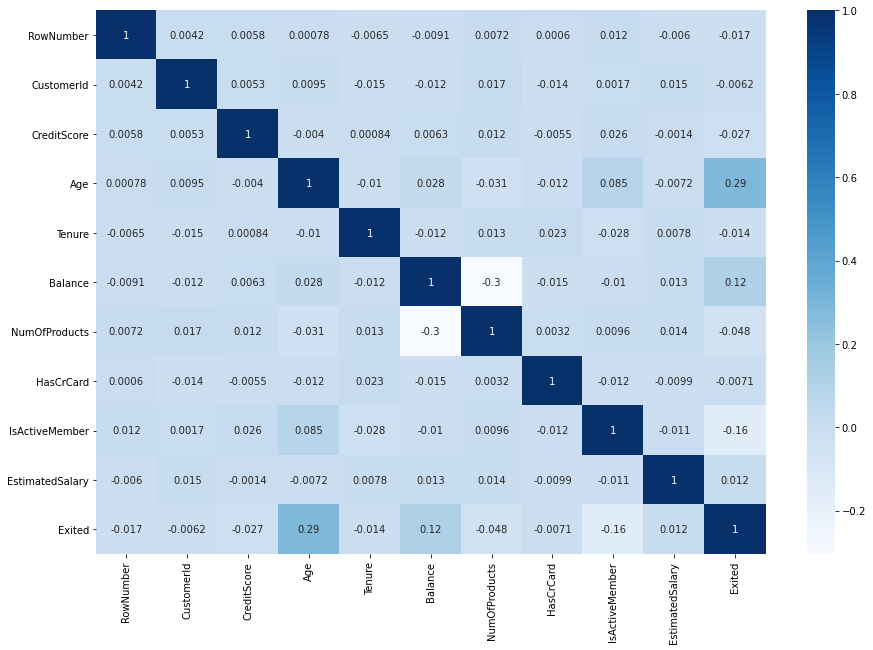

In [6]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')

In [7]:
# IsActiveMember, HasCrCard are supposed to be categorical values instead of numerical
# because one of the values will be dropped when get_dummies() is applied

In [8]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [50]:
df['IsActiveMember'] = df['IsActiveMember'].astype(str)
df['HasCrCard'] = df['HasCrCard'].astype(str)

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

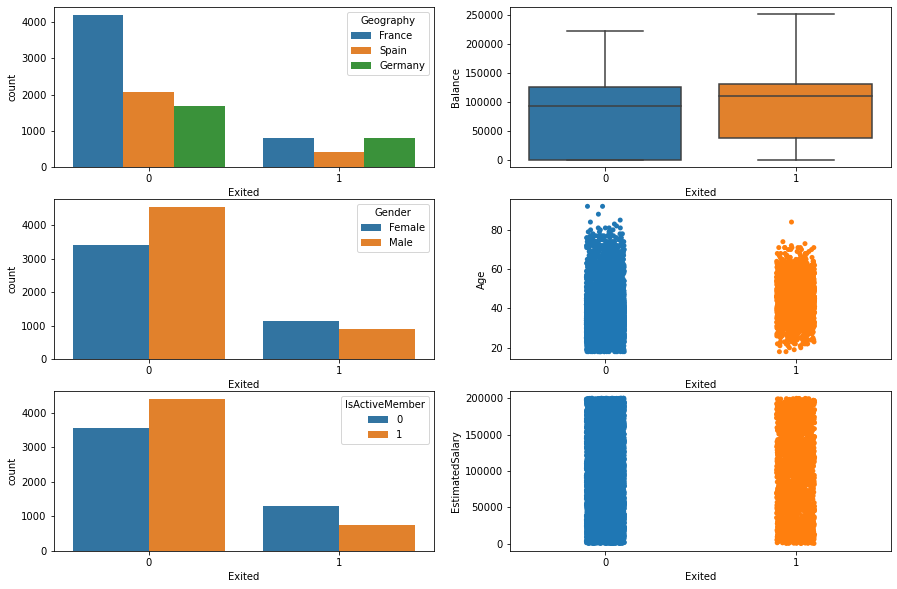

In [51]:
plt.figure(figsize = (15,10))

plt.subplot(3,2,1)
sns.countplot(data = df, x = 'Exited', hue = 'Geography')

plt.subplot(3,2,2)
sns.boxplot(data = df, x = 'Exited', y = 'Balance')

plt.subplot(3,2,3)
sns.countplot(data = df, x = 'Exited', hue = 'Gender')

plt.subplot(3,2,4)
sns.stripplot(data = df, x = 'Exited', y = 'Age')

plt.subplot(3,2,5)
sns.countplot(data = df, x = 'Exited', hue = 'IsActiveMember')

plt.subplot(3,2,6)
sns.stripplot(data = df, x = 'Exited', y = 'EstimatedSalary')

In [52]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [53]:
countplot_percentages(df, 'Geography', 'Exited')

France 1 Percentage --> 16.15476665337056
France 0 Percentage --> 83.84523334662944
Spain 1 Percentage --> 16.67339523617279
Spain 0 Percentage --> 83.3266047638272
Germany 1 Percentage --> 32.44320446392985
Germany 0 Percentage --> 67.55679553607014


In [54]:
countplot_percentages(df, 'Gender', 'Exited')

Female 1 Percentage --> 25.071538630860665
Female 0 Percentage --> 74.92846136913934
Male 1 Percentage --> 16.455928165658786
Male 0 Percentage --> 83.54407183434121


In [55]:
# Try with all variables 43

In [110]:
X = df.iloc[:, 3:13]
y = df.iloc[:, 13]

In [111]:
X = pd.get_dummies(X , drop_first=True)

In [112]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 435)

In [113]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [114]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

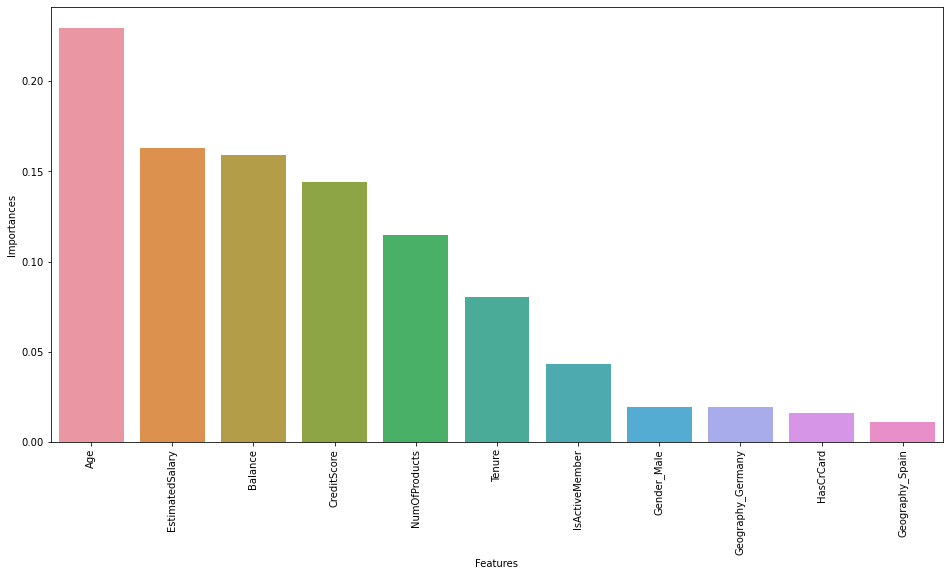

In [115]:
features = return_feature_importances(classifier)

In [116]:
features

,Features,Importances
1,Age,0.229698
7,EstimatedSalary,0.163124
3,Balance,0.159036
0,CreditScore,0.144310
4,NumOfProducts,0.114733
2,Tenure,0.080178
6,IsActiveMember,0.043083
10,Gender_Male,0.019486
8,Geography_Germany,0.019196
5,HasCrCard,0.016291


In [117]:
y_pred = classifier.predict(X_test)

<AxesSubplot:>

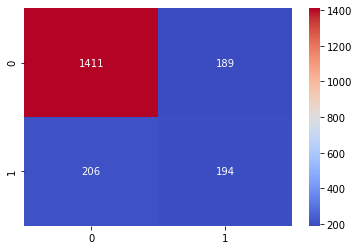

In [118]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, cmap ='coolwarm',fmt='.4g')

In [119]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1600
           1       0.51      0.48      0.50       400

    accuracy                           0.80      2000
   macro avg       0.69      0.68      0.69      2000
weighted avg       0.80      0.80      0.80      2000



In [120]:
accuracy_score(y_test,y_pred)

0.8025

In [25]:
# Drop HasCrCard and Gender columns since they have lower feature importances

In [121]:
path = 'C:\\Users\\Ufuk Altan\\Desktop\\School\\Semester1\\MarketingAnalysis\\data\\'
df = pd.read_csv(path + 'Churn_Modelling.csv')

In [122]:
X = df.iloc[:, 3:13].drop(['HasCrCard', 'Gender'], axis = 1)
y = df.iloc[:, 13]

In [123]:
X = pd.get_dummies(X , drop_first=True)

In [124]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 435)

In [125]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [126]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

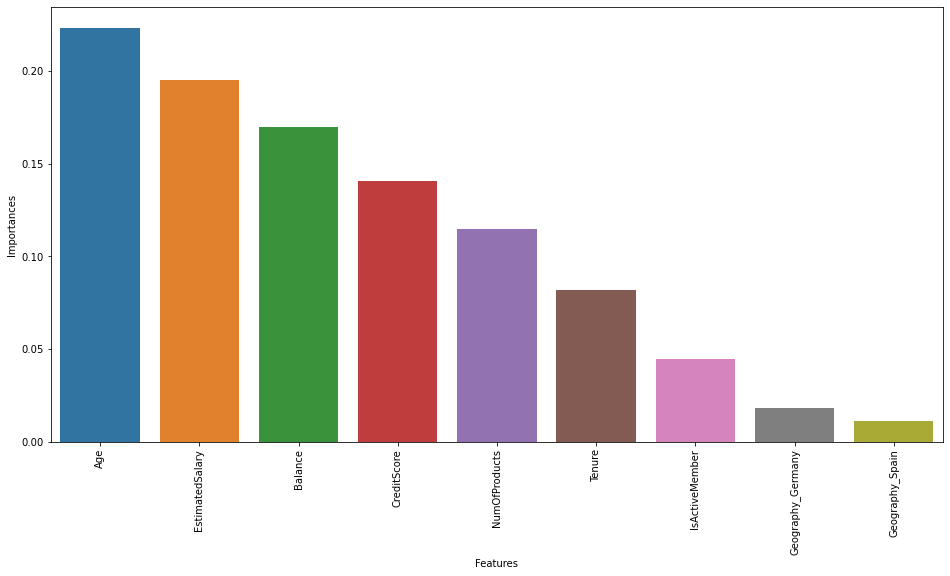

In [127]:
features = return_feature_importances(classifier)

In [128]:
y_pred = classifier.predict(X_test)

<AxesSubplot:>

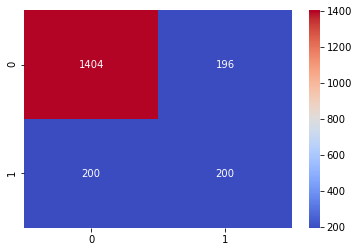

In [129]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, cmap ='coolwarm',fmt='.4g')

In [130]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1600
           1       0.51      0.50      0.50       400

    accuracy                           0.80      2000
   macro avg       0.69      0.69      0.69      2000
weighted avg       0.80      0.80      0.80      2000



In [131]:
accuracy_score(y_test,y_pred)

0.802

In [132]:
# There 7963 '1' values and 2037 '0' values on the 'Exited column'. Classes are highly unbalance therefore equalizing the 
# data amount might be an option even though dropping data is very dangerous
# Balancing the classes

In [133]:
path = 'C:\\Users\\Ufuk Altan\\Desktop\\School\\Semester1\\MarketingAnalysis\\data\\'
df = pd.read_csv(path + 'Churn_Modelling.csv')

In [134]:
df = balance_classes(df, 'Exited')
df['Exited'].value_counts()

1    2037
0    2037
Name: Exited, dtype: int64

In [135]:
X = df.iloc[:, 3:13]
y = df.iloc[:, 13]

In [136]:
X = pd.get_dummies(X , drop_first=True)

In [137]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 435)

In [138]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [139]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

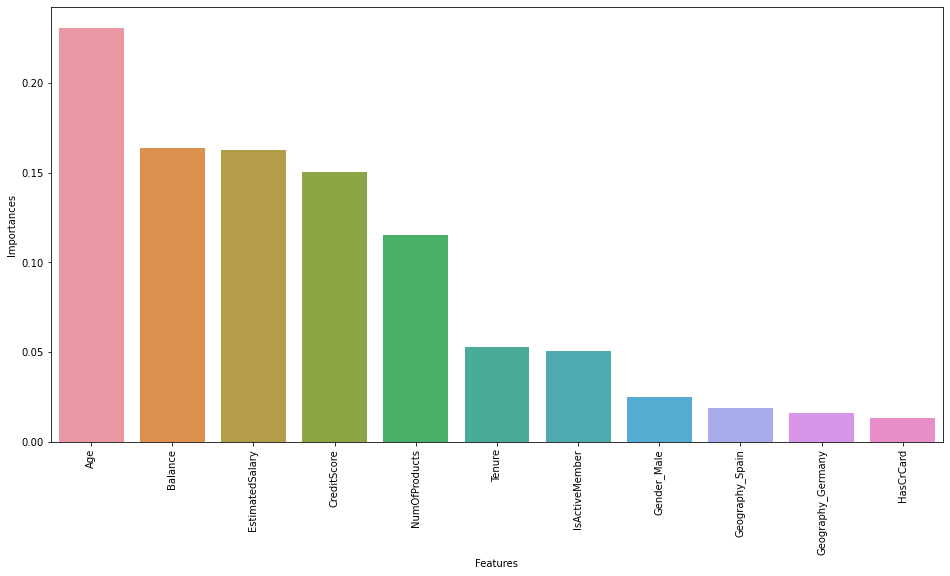

In [140]:
features = return_feature_importances(classifier)

In [141]:
y_pred = classifier.predict(X_test)

<AxesSubplot:>

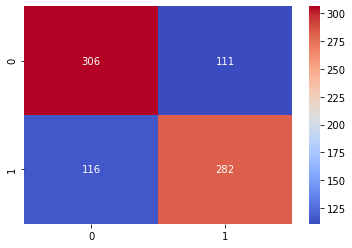

In [142]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, cmap ='coolwarm',fmt='.4g')

In [143]:
#Accuracy is lower, however, there is a higher achievement on the '1' values. Looks like it is a trade off

In [144]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       417
           1       0.72      0.71      0.71       398

    accuracy                           0.72       815
   macro avg       0.72      0.72      0.72       815
weighted avg       0.72      0.72      0.72       815



In [ ]:
# Model that does not use HasCrCard and Gender variables are more preferable since these two variables are hardly contributing 
# the results. It is rational to remove variables that have lower feature importance for computational efficiency.

# Balancing classes is a considerable method since company owner intend to detect customers that tend to exit the company 
# services. Balancing the classes brings higher precision on value '1'. It is a trade off.